In [1]:
#                                                 DATA COLLECTION
import pandas as pd
import numpy as np
data=pd.read_csv("Videos/database.csv")
data

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


In [2]:
#product without prices
a=data['uuid']
b=data['price_string'].isna()
c=list(zip(a,b))
df = pd.DataFrame(c,columns=['uuid','price_string'])
df

,uuid,price_string
0,638744a4-b0ae-4166-8cb6-5c063c862036,True
1,ab313969-02cc-48b2-9daf-0054efb70b92,True
2,acbd66ff-79f8-467a-91f9-108a45af5626,False
3,963915d6-b2e3-4098-b242-9410593cf205,False
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,False
...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,True
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,False
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,True
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,True


In [3]:
#product without prices
b=data[data['price_string'].isna()]  
b
df_1=pd.DataFrame(b)
df_1

#count of products without prices  in product_type,Category and level_1

print('product_type',df_1['product_type'].isna().sum())
print('category',df_1['category'].isna().sum())
print('level_1',df_1['level_1'].isna().sum())

product_type 10000
category 10000
level_1 40000


In [4]:
#product with prices
c=data[data['price_string'].notna()]  
c
df_2=pd.DataFrame(b)
df_2

#count of products with prices  in product_type,Category and level_1

print('product_type',df_2['product_type'].notna().sum())
print('category',df_2['category'].notna().sum())
print('level_1',df_2['level_1'].notna().sum())

product_type 8210000
category 8210000
level_1 8180000


In [5]:
#correcting product prices with correct format
data.price_string=data.price_string.str.lstrip('$')
data

data['price_string']='$ ' + data['price_string'].astype(str)
data

#separating price_string into Currency and values columns

data[['currency','values']]=data.price_string.str.split(pat=' ',expand=True)
data

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,values
0,638744a4-b0ae-4166-8cb6-5c063c862036,$ nan,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,$,nan
1,ab313969-02cc-48b2-9daf-0054efb70b92,$ nan,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,$,nan
2,acbd66ff-79f8-467a-91f9-108a45af5626,$ 19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$ 92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$ 11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,$,11.50
...,...,...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,$ nan,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,$,nan
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$ 69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,$,69.99
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,$ nan,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz,$,nan
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,$ nan,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz,$,nan


In [11]:
#creating a new dataframe with category and values
a=data['category']
b=data['values']
list_1=list(zip(a,b))
result=pd.DataFrame(list_1,columns=['category','values'])


#converting values column datatype from object to float
result['values'] = result['values'].astype(float, errors = 'raise')

#printing result of average price for each category of product
graph=result.groupby(['category'])['values'].mean().reset_index()
graph

,category,values
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871
1,QXJ0IHN1cHBsaWVz,19.471053
2,QmFieWNhcmU,163.688889
3,RWxlY3Ryb25pY3M,60.258182
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
5,SGVhbHRo,32.557586
6,VG95cyBhbmQgR2FtZXM,32.448947
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067
9,Z3JvY2VyaWVz,10.541667


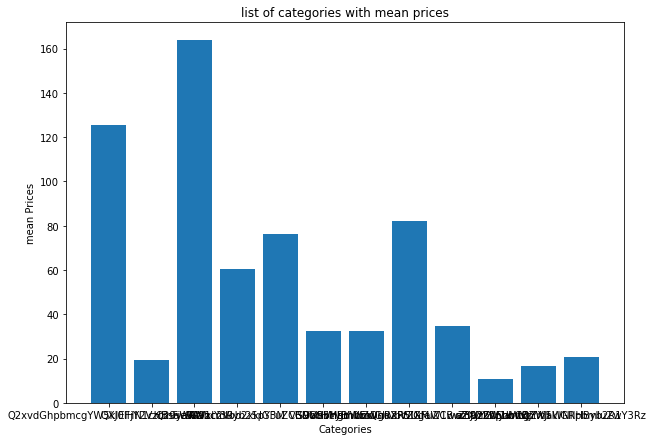

In [12]:
#depicting above data
import pandas as pd
from matplotlib import pyplot as plt
#creating dataframe of above data
graph.head()
df = pd.DataFrame(graph)

#assigning values 

cat = df['category'].head(12)
val = df['values'].head(12)

# Figure Size
fig = plt.figure(figsize =(10,7))

# Horizontal Bar Plot
plt.bar(cat[0:12], val[0:12])

plt.xlabel("Categories")
plt.ylabel("mean Prices")
plt.title("list of categories with mean prices")

# Show Plot
plt.show()